In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K

from keras.activations import *
from keras.models import Model, Sequential
from keras.applications import vgg16, imagenet_utils

from Deconvnet.deconvnet import Deconvnet

Using TensorFlow backend.


In [2]:
model = vgg16.VGG16(weights = 'imagenet', include_top = True)

In [3]:
from utils import resize

_class = 1

x_test = np.load("/data1/share/cinic_256x256_valid_x.npy")
y_test = np.load("/data1/share/cinic_256x256_valid_y.npy")

x_test = x_test[y_test.argmax(axis=-1) == _class]

x_test = resize(x_test[:100], target=(224, 224))

# Testing Forward Pass

In [9]:
# Test image
data = x_test[0:1]

imagenet_utils.preprocess_input(data)

num_layers = 8

In [10]:
# Pass data forward through deconvnet

deconv_model = Deconvnet(model, num_layers)

output = deconv_model.forward(data)

In [11]:
# Pass data forward through network

out_layer = model.layers[num_layers - 1]

test_model = Model(model.input, out_layer.output)

test_out = test_model.predict(data)

In [12]:
# Verify they return the same value

print("Test Result:", (test_out == output).all())

Test Result: True


# Test Full Reconstruction with Backward Pass

In [13]:
deconv = deconv_model.backwards(output)

In [14]:
# normalize output to (0, 1) range

img = deconv - deconv.min()
img *= 1.0 / (img.max() + 1e-16)

Test result


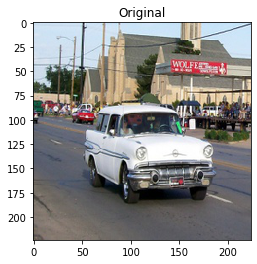

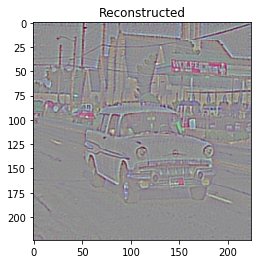

In [15]:
# verify network is recontructing image to some degree

print("Test result")

plt.imshow(data[0])
plt.title("Original")
plt.show()

plt.imshow(img)
plt.title("Reconstructed")
plt.show()

# Test Single Kernel Reconstruction with Backward Pass

In [18]:
deconv = deconv_model.backwards(output, 30)

In [19]:
# normalize output to (0, 1) range

img = deconv - deconv.min()
img *= 1.0 / (img.max() + 1e-16)

Test result


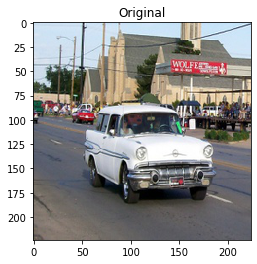

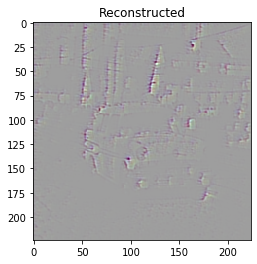

In [20]:
# verify network is recontructing image to some degree

print("Test result")

plt.imshow(data[0])
plt.title("Original")
plt.show()

plt.imshow(img)
plt.title("Reconstructed")
plt.show()